# Generate data with uniform and Gaussian distributions

In [30]:
#Generate data with Gaussian distribution
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

def calculate_entropy(p_x):
    eps = 0.000001
    p_x += eps
    temp = p_x * torch.log2(p_x)
    return -1 * temp.sum()


    

def plot_bar(bins, histogram):
    fig = plt.figure()
    axes = fig.add_axes([0, 0, 1, 1])
    axes.bar(bins[1:].tolist(), histogram.tolist())
    plt.show()
    




In [5]:
#small sample
lambda_dist = 2.4
n = 10
exponential_dist = torch.distributions.exponential.Exponential(lambda_dist)
exponential_sample = exponential_dist.sample((n,1)).squeeze()

print("exponential_sample \n ", exponential_sample)

exponential_sample 
  tensor([0.7735, 0.4823, 0.1249, 0.5615, 0.0289, 0.6602, 0.0054, 0.4019, 0.6994,
        0.0476])


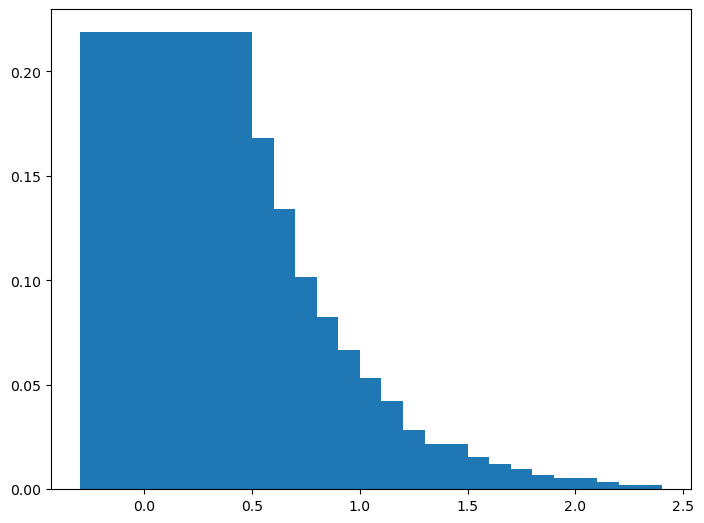

sum of p[x] =  tensor(1., dtype=torch.float64)


In [6]:

#create exponential sample
lambda_dist = 2.4
n = 10000
exponential_dist = torch.distributions.exponential.Exponential(lambda_dist)
exponential_sample = exponential_dist.sample((n,1)).squeeze()
#number of bins: number of bins within the range
histogram_exponential, bins_exponential = np.histogram(exponential_sample.numpy(), bins = 20, range = (0, 2))
#normalize the histogram to estimate a density function
p_exponential = torch.tensor(histogram_exponential / histogram_exponential.sum())
plot_bar(bins_exponential, p_exponential)

print("sum of p[x] = ", p_exponential.sum())

In [9]:
def P(z, p_x):
    P_z = p_x[0:z].sum()
    return P_z

print("bins_exponential ", bins_exponential)
z = 20
P_z = P(z, p_exponential)
print("P_z ", P_z)

bins_exponential  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
P_z  tensor(1., dtype=torch.float64)


In [36]:
n = 5000
#create gaussian noise values
normal_dist = torch.distributions.Normal(torch.tensor([15.0]), torch.tensor([5.5]))
gaussian_sample = normal_dist.sample((n,1)).squeeze()

print("Estimated expectation (statistic) ", gaussian_sample.mean())
print(gaussian_sample)

Estimated expectation (statistic)  tensor(15.0751)
tensor([10.4256, 21.8098, 20.8677,  ..., 11.5391, 16.0726, 27.3006])


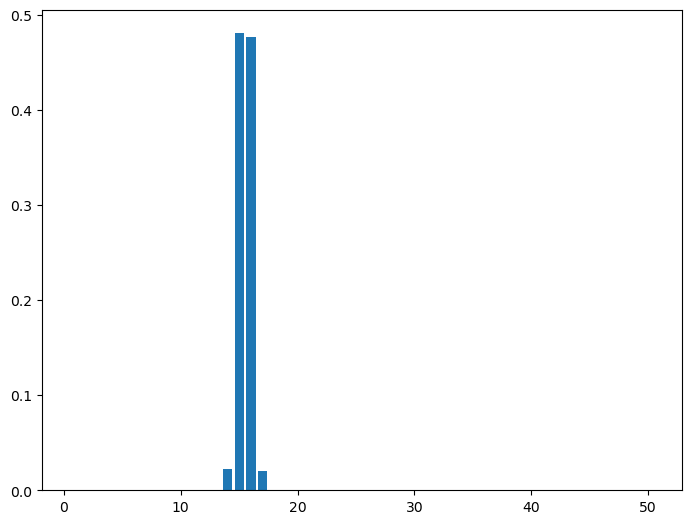

verify p[x] property
Sum values is 1:  tensor(1., dtype=torch.float64)
Entropy P_1:  tensor(1.2548, dtype=torch.float64)


In [34]:
#calculate histogram
histogram, bins = np.histogram(gaussian_sample.numpy(), bins = 50, range = (0, 50))

p_1 = torch.tensor(histogram / histogram.sum())
#plot histogram
plot_bar(bins, p_1.numpy())
print("verify p[x] property")
print("Sum values is 1: ", p_1.sum())

ent_p1 = calculate_entropy(p_1)
#ent2 = entropy([0.5, 0.5], base=2)
print("Entropy P_1: ", ent_p1)

## Cumulative density function

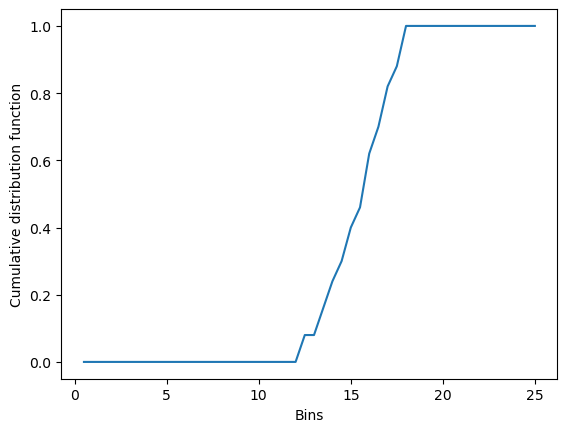

In [5]:
def calculate_cdf(p):
    #extract number of bins
    num_bins = p.shape[0]
    #init cdf array
    cdf_p = torch.zeros(num_bins)
    for i in range(0, num_bins):
        #calculate the cumulative value 
        cdf_p[i] = torch.sum(p[0:i])
    return cdf_p

cdf_p_1 = calculate_cdf(p_1)
plt.plot(bins[1:], cdf_p_1)
plt.xlabel("Bins")
plt.ylabel("Cumulative distribution function")
plt.show()

        

## Statistical moments and entropy 

### Mean and variance

In [12]:
import torch

x1 = torch.tensor([2.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0])

E_x_1 = x1.sum() / x1.shape[0]
E_x_2 = torch.mean(x1)
print("E[x] (1): ", E_x_1)
print("E[X] (2): ", E_x_2)
# las y o cantidad de numeros de eventos por variable
hist_x1 = torch.tensor([1.0, 2.0, 1.0, 3.0])

# los eventos de ocurren
bins = torch.tensor([1.0, 2.0, 3.0, 4.0])

p_x1 = hist_x1 / hist_x1.sum()
print("p_x1 ", p_x1)
print("p_x1 sum ", p_x1.sum())

E_x_3 = p_x1.dot(bins)
print("E_x_3 ", E_x_3)


P_1  = torch.sum(p_x1[:2])
print("P1 ", P_1)

P_2 = torch.sum(p_x1[2:])
print("P2 ", P_2)

print("P1 + P2 ", P_1 + P_2)

E[x] (1):  tensor(2.8571)
E[X] (2):  tensor(2.8571)
p_x1  tensor([0.1429, 0.2857, 0.1429, 0.4286])
p_x1 sum  tensor(1.)
E_x_3  tensor(2.8571)
P1  tensor(0.4286)
P2  tensor(0.5714)
P1 + P2  tensor(1.)


In [16]:
x1 = torch.tensor([2.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0])
hist_x1 = torch.tensor([1.0, 2.0, 1.0, 3.0])
bins = torch.tensor([1.0, 2.0, 3.0, 4.0])
p_x1 = hist_x1 / hist_x1.sum()

var_x1 = x1.var()
var_x2 = (((x1 - E_x_3) ** 2) / x1.shape[0]).sum()
var_x3 = p_x1.dot((bins - E_x_3) ** 2)


print("var_x1 ", var_x1)
print("var_x2 ", var_x2)
print("var_x3 ", var_x3)

hist_x1 = torch.tensor([1.0, 2.0, 1.0, 3.0])
bins = torch.tensor([1.0, 2.0, 3.0, 4.0])






var_x1  tensor(1.4762)
var_x2  tensor(1.2653)
var_x3  tensor(1.2653)


In [12]:
x = torch.tensor([5.0, 5, 5, 10, 20])
expected_value = x.mean()
print("expected_value from sample", expected_value)

x_p = torch.tensor([5.0, 10, 20])
p_x = torch.tensor([3/5, 1/5, 1/5])

expected_value = (x_p * p_x).sum()
print("Expected value from pdf ", expected_value)



expected_value from sample tensor(9.)
Expected value from pdf  tensor(9.)


In [15]:
variance_data = ((x - expected_value) ** 2).sum() * (1 / x.shape[0])

variance_pdf = (((x_p - expected_value) ** 2) * p_x).sum()

print("variance data ", variance_data)
print("variance pdf ", variance_pdf)

variance data  tensor(34.)
variance pdf  tensor(34.)


In [ ]:
var_x = (x - expected_value) ** 2
var_x = (1 / (x.shape[0] - 1))* var_x.sum()

print("var_x ", var_x)
var_x_pytorch = x.var()
print("var_x_pytorch ", var_x_pytorch)

In [7]:
X = torch.tensor([[93.0, 92.1, 92.2, 95, 97, 92.3], [92.0, 82.1, 82.2, 85, 87, 82.3]])
means_x = torch.mean(X, dim = 1)
var_x = torch.var(X, dim = 1)
std_x = torch.std(X, dim = 1)
print("means \n ", means_x)
print("vars \n", var_x)
print("stds \n ", std_x)

means 
  tensor([93.6000, 85.1000])
vars 
 tensor([ 3.9560, 15.2960])
stds 
  tensor([1.9890, 3.9110])


p_1 
 [3 1 0 0 0 1 0 0 0 1]
bins  [92.1  92.59 93.08 93.57 94.06 94.55 95.04 95.53 96.02 96.51 97.  ]


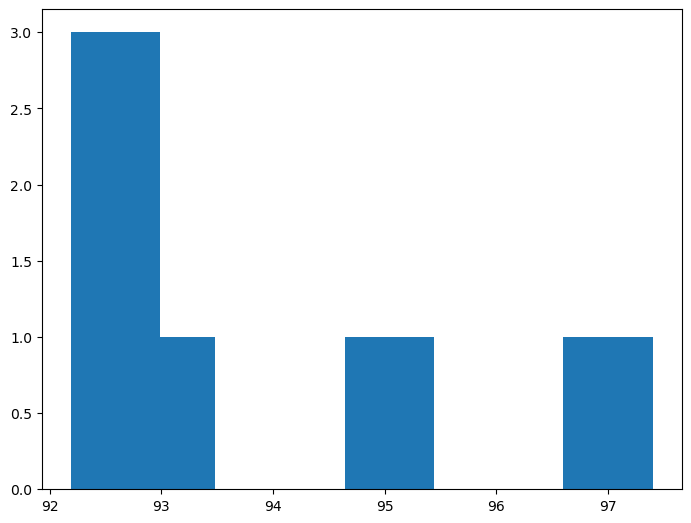

Expectation X1 
 562.8899917602539


In [8]:
def calculate_expectation(p, bins):
    return p.dot(bins[1:])

#calculation of densities for each variable
p_1, bins_p_1 = np.histogram(X[0, :].numpy(), bins = 10, range = (torch.min(X[0, :]).item(), torch.max(X[0, :]).item()))
#p_1 = p_1 / p_1.sum()

print("p_1 \n", p_1)
print("bins ", bins_p_1)
plot_bar(bins_p_1, p_1)
expectation_1 = calculate_expectation(p_1, bins_p_1)
print("Expectation X1 \n", expectation_1)



    

In [10]:
#expectation
#expectation definition
x_times_p_x = p_1 * bins[0:-1]
expectation = x_times_p_x.sum()
print("Expectation definition E[X]: ", expectation)
#sample mean
sample_mean = torch.mean(gaussian_sample)
print("Sample mean ", sample_mean)

ValueError: operands could not be broadcast together with shapes (10,) (50,) 

### Entropy

In [28]:
#entropy
p_x = torch.tensor([0.1, 0.3, 0.5, 0.1])
entropy_x = calculate_entropy(p_x)
print("entropy_x ", entropy_x)


entropy_x  tensor(1.6855)


In [ ]:
#Uniform distribution
uniform_sample = 20 * torch.rand(1000)
histogram2, bins2 = np.histogram(uniform_sample.numpy(), bins = 10, range = (0, 20))
p_2 = torch.tensor(histogram2 / histogram2.sum())
plot_bar(bins2, p_2.numpy())
ent_p2 = calculate_entropy(p_2)
print("Entropy P_2: ", ent_p2)

### Skew and Kurtosis

In [38]:
def calculate_skew_kurtosis(data):
    mean = torch.mean(data)
    diffs = data - mean
    var = torch.mean(torch.pow(diffs, 2.0))
    std = torch.pow(var, 0.5)
    zscores = diffs / std
    skew = torch.mean(torch.pow(zscores, 3.0)) 
    
    
    kurtosis = torch.mean(torch.pow(zscores, 4.0)) - 3.0
    return (skew, kurtosis)

skew_1, kurtosis_1 = calculate_skew_kurtosis(gaussian_sample)
print("Gaussian skew ", skew_1, " and kurtosis ", kurtosis_1)

skew_2, kurtosis_2 = calculate_skew_kurtosis(exponential_sample)
print("Exponential skew ", skew_2, " and kurtosis ", kurtosis_2)



#skew_3, kurtosis_3 = calculate_skew_kurtosis(X[0, :])
#print("Exponential skew 3 ", skew_3, " and kurtosis 3", kurtosis_3)

Gaussian skew  tensor(-0.0003)  and kurtosis  tensor(-0.0351)
Exponential skew  tensor(1.9421)  and kurtosis  tensor(5.2648)


## Covariance matrix

In [27]:
x_a = torch.tensor([[90, 91, 93, 94.0, 92, 95, 96, 97, 100]])
x_b = torch.tensor([[80, 81, 83.0, 84, 82, 85, 86, 87, 90]])
mean_x_a = x_a.mean()
mean_x_b = x_b.mean()
print("Expectation x_a ", mean_x_a)
print("Expectation x_b ", mean_x_b)

print("var x_a ", x_a.var())
print("var x_b ", x_b.var())
X = torch.cat((x_a, x_b), 0)
print("X \n ", X)
Sigma_X = torch.cov(X)
Rho_X = np.corrcoef(X.numpy())

print("Rho_X \n", Rho_X)

Expectation x_a  tensor(94.2222)
Expectation x_b  tensor(84.2222)
var x_a  tensor(9.9444)
var x_b  tensor(9.9444)
X 
  tensor([[ 90.,  91.,  93.,  94.,  92.,  95.,  96.,  97., 100.],
        [ 80.,  81.,  83.,  84.,  82.,  85.,  86.,  87.,  90.]])
Rho_X 
 [[1. 1.]
 [1. 1.]]


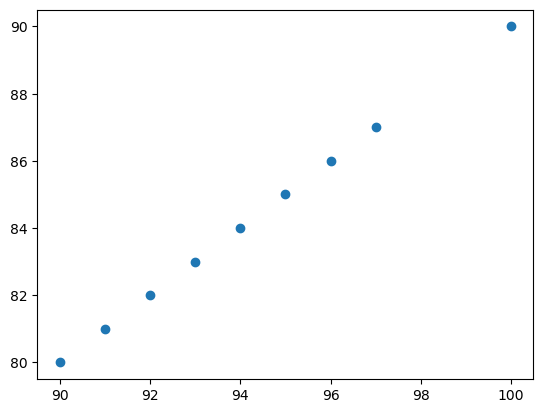

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x_a, x_b)
plt.show()

In [26]:
import torch
import numpy as np

X = torch.tensor([[10.0, 12, 14, 16], [20.0, 240, 28, 32], [22.0, 24, 28, 352]])
mean_array = torch.zeros(2)
var_array = torch.zeros(2)
mean_array[0] = torch.mean(X[0, :])
mean_array[1] = torch.mean(X[1, :])
var_array[0] = torch.var(X[0, :])
var_array[1] = torch.var(X[1, :])

print("mean array \n ", mean_array)
Sigma = torch.cov(X)
Rho_pearson = np.corrcoef(X.numpy())
print("Sigma \n ", Sigma)
print("var array  \n", var_array)
print("Rho_pearson \n ")
print(Rho_pearson)

mean array 
  tensor([13., 80.])
Sigma 
  tensor([[ 6.6667e+00, -5.8667e+01,  3.3133e+02],
        [-5.8667e+01,  1.1403e+04, -5.2773e+03],
        [ 3.3133e+02, -5.2773e+03,  2.6793e+04]])
var array  
 tensor([6.6667e+00, 1.1403e+04])
Rho_pearson 
 
[[ 1.         -0.21278148  0.78397116]
 [-0.21278148  1.         -0.30192609]
 [ 0.78397116 -0.30192609  1.        ]]


# Generate noisy data with linear correlation

In [18]:
import numpy as np
import torch
import matplotlib.pyplot as plt



## Gaussian noise signal contamination

In [19]:
#create x values
x_torch = torch.arange(1, 10, 0.5)
print(x_torch)

tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000,
        5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])


In [20]:
#create y values
#create gaussian noise values
normal_dist = torch.distributions.Normal(torch.tensor([0.0]), torch.tensor([9.0]))
epsilon_gaussian = normal_dist.sample(x_torch.shape).squeeze()

print("Datos con distribucion gaussiana")
print(epsilon_gaussian)

#include gaussian noise values
y_torch = 2.1 * x_torch + epsilon_gaussian
print(epsilon_gaussian.shape)
print(y_torch.shape)
print(x_torch.shape)

Datos con distribucion gaussiana
tensor([ 18.3855,   3.3761,   5.0994,  -8.1786,   9.3114,   9.1369,  13.3567,
         -2.2627,   2.6013, -16.6347,   1.5445,  -3.2007,  -6.9524,  -6.1401,
        -14.3524,  -3.1334, -11.0151, -15.6870])
torch.Size([18])
torch.Size([18])
torch.Size([18])


## Scatter plot

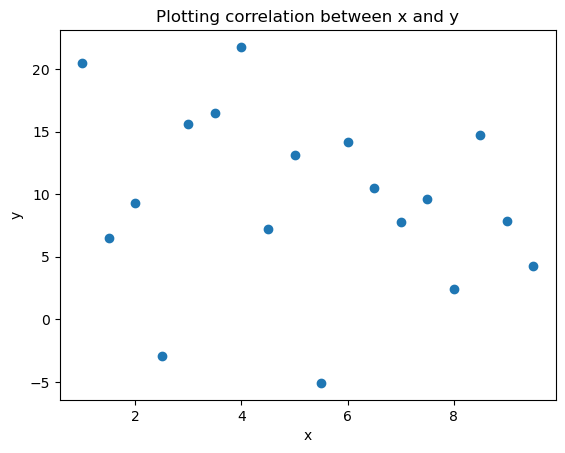

In [21]:
# Plot
plt.scatter(x_torch, y_torch)
plt.title('Plotting correlation between x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Evaluate the distance between two distributions
We can evaluate the Gaussian distribution analytically

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
torch.pi = torch.tensor(np.pi)
"""
Evaluate the gaussian function analytically 2d
"""
def evaluate_gaussian_2d(mu_array, Sigma, x_array):
    num_dimensions = mu_array.shape[0]
    print("num dimensions ", num_dimensions)
    determinant_Sigma = torch.det(Sigma)
    #normalization factor
    norm_factor =  1 / torch.sqrt((2 * torch.pi)** num_dimensions)
    #cuadratic form exponent
    cuadratic_form = (x_array - mu_array).transpose(0, 1).mm(Sigma.inverse()).mm(x_array - mu_array)
    #final value
    gauss_result = norm_factor * torch.exp(-0.5*cuadratic_form)
    return gauss_result


def evaluate_gaussian_1d_hist(mu, sigma):
    n = 1000000
    #create gaussian noise values
    normal_dist = torch.distributions.Normal(torch.tensor([mu]), torch.tensor([sigma]))
    gaussian_sample = normal_dist.sample((n,1)).squeeze()
    #print(gaussian_sample)
    #calculate histogram
    histogram, bins = np.histogram(gaussian_sample.numpy(), bins = 100, range = (0, 20))
    p_density = torch.tensor(histogram / histogram.sum())
    return (bins, p_density)

"""
Evaluate the gaussian function analytically 1d
"""
def evaluate_gaussian_1d(mu, sigma, x):
    #normalization coefficient
    norm_coefficient = 1 / (sigma * torch.sqrt(2 * torch.pi ))
    
    #exponent
    exponent = -0.5 * (((x - mu) / sigma) ** 2 )
    #final value
    gauss_result = norm_coefficient * torch.exp(torch.tensor(exponent))
    return gauss_result

def test_2d_evaluation():
    #always arrays 2D tensors
    #value to evaluate
    x_array = torch.tensor([[0.9], [3.0]])
    #mu of the gauss function
    mu_array = torch.tensor([[2.0], [3.0]])
    #Covariance matrix of the gaussian function
    Sigma = torch.tensor([[2.0, 0], [0, 3.0]])
    gauss_result = evaluate_gaussian_2d(mu_array, Sigma, x_array)
    print(gauss_result)

def test_1d_evaluation():
    mu = 3.0
    sigma = 1.0
    x = 3
    gauss_value = evaluate_gaussian_1d(mu, sigma, x)
    print("Gauss value ", gauss_value)
    #with histogram for array evaluation
    (bins, gauss_array) = evaluate_gaussian_1d_hist(mu, sigma)
    plot_bar(bins, gauss_array.numpy())
    print("value evaluated :", bins[25])
    print("Gauss value hist ", gauss_array[25])
    print("torch sum ", gauss_array.sum())

    
    
    
test_1d_evaluation()

#1d evaluation
    

First distribution


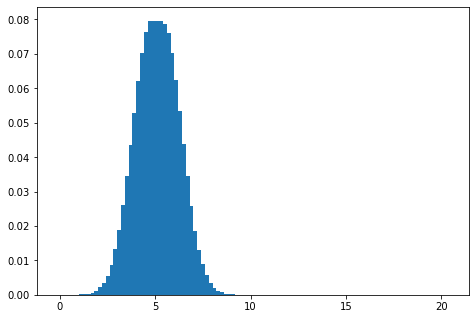

Second distribution


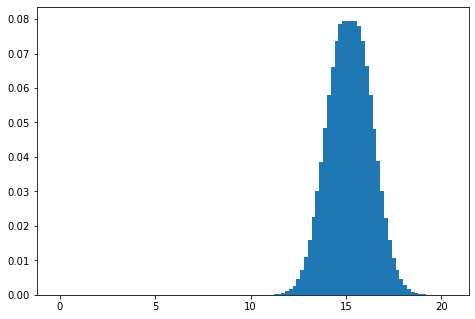

ce_result  tensor(11.5129, dtype=torch.float64)
Bhattarchayya distance  tensor(3.4472, dtype=torch.float64)


In [12]:
"""
Calculate cross entropy
"""
def calculate_cross_entropy(p, y):
    eps = 0.00001
    y_log = -torch.log(y + eps)
    ce_result = torch.sum(p * y_log)
    return ce_result

def calculate_bhattacharyya_distance(p, y):
    eps = 0.00001
    p += eps
    y += eps
    bhattacharyya_dist = -torch.log(torch.sum(torch.sqrt(p * y)))
    return bhattacharyya_dist

def test_1_near():
    #first distribution
    (bins_1, gauss_array_1) = evaluate_gaussian_1d_hist(5.0, 1.0)
    print("First distribution")
    plot_bar(bins_1, gauss_array_1.numpy())
    #second distribution
    (bins_2, gauss_array_2) = evaluate_gaussian_1d_hist(15.1, 1.0)
    print("Second distribution")
    plot_bar(bins_2, gauss_array_2.numpy())
    #calculate cross entropy
    ce_result = calculate_cross_entropy(gauss_array_1, gauss_array_2)
    print("ce_result ", ce_result)
    #calculate hellinger distance
    hellinger_dist = calculate_bhattacharyya_distance(gauss_array_1, gauss_array_2)
    print("Bhattarchayya distance ", hellinger_dist)
    
    
test_1_near()

    
